In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/streaming_titles.csv")
print(len(df))

print(df.columns)

22998
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'streaming_service', 'score', 'imdbid'],
      dtype='object')


In [5]:
df[df['imdbid'].notnull() & (df['score'] > 0) & (df['cast'].notnull()) & (df['streaming_service'] == "netflix")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,streaming_service,score,imdbid
12742,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",netflix,72.0,tt9839146
12743,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,netflix,64.0,tt13278100
12746,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,netflix,75.0,tt10574558
12747,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,netflix,73.0,tt10101702
12748,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",netflix,83.0,tt0108041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21536,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,netflix,30.0,tt3696476
21541,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",netflix,41.0,tt2828240
21543,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",netflix,81.0,tt0443706
21545,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,netflix,77.0,tt1156398


array([[<AxesSubplot:title={'center':'2001'}>,
        <AxesSubplot:title={'center':'2002'}>,
        <AxesSubplot:title={'center':'2003'}>,
        <AxesSubplot:title={'center':'2004'}>,
        <AxesSubplot:title={'center':'2005'}>],
       [<AxesSubplot:title={'center':'2006'}>,
        <AxesSubplot:title={'center':'2007'}>,
        <AxesSubplot:title={'center':'2008'}>,
        <AxesSubplot:title={'center':'2009'}>,
        <AxesSubplot:title={'center':'2010'}>],
       [<AxesSubplot:title={'center':'2011'}>,
        <AxesSubplot:title={'center':'2012'}>,
        <AxesSubplot:title={'center':'2013'}>,
        <AxesSubplot:title={'center':'2014'}>,
        <AxesSubplot:title={'center':'2015'}>],
       [<AxesSubplot:title={'center':'2016'}>,
        <AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>,
        <AxesSubplot:title={'center':'2019'}>,
        <AxesSubplot:title={'center':'2020'}>],
       [<AxesSubplot:title={'center':'2021'}>, <AxesSubp

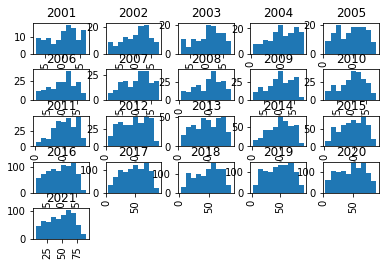

In [6]:
df[(df['score'] > 0) & (df['release_year'] > 2000)]['score'].hist(by=df["release_year"])